# Newton's Divided Difference

This method allow us to find a polynomial function that passes through all our data points. 

<strong>Definion:</strong> The function $y = P(x)$ interpolates the data points $(x_{1}, y_{1}),...,(x_{n}, y_{n})$ if $P(x_{i}) = y_{i}$ for each $1 \leq i \leq n$

<strong>Theorem: Main Theorem for Polynomial Interpolation</strong> Let $(x_{1}, y_{1}),...,(x_{n}, y_{n})$ be $n$ pointes in the plane qith distinct $x_{j}$. Then there exists one and only one polynomial P of degree $n - 1$ or less that satisfies $P(x_{i}) = j_{i}$ for $i = 1,...,n$

<strong>Definion:</strong> Denote by $f[x_{i} ... x_{n}]$ the coefficients of the $x^{n-1}$ term in the (unique) polynomial that interpolates $(x_{1}, f(x_{1})),...,(x_{n}, f(x_{n}))$

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def newtdd(x0,y0,n):
    """
    input: x0 array of x-values
           y0 array with y-values
           n number of data points
           
    Output: array with the coefficient values and the polynomial
    """
    coeff = np.zeros(n)
    v = np.zeros((n,n))
    
    # filling the y column of the newton triangle
    for i in range(0,n):
        v[i,0] = y0[i]
    
    for i in range(1,n):
        for j in range(0,n-i):
            v[j,i] = (v[j+1,i-1] - v[j,i-1])/(x0[j+i]-x0[j])
    # Getting the values of the coefficients
    for i in range(0,n):
        coeff[i] = v[0,i]
    
    # Creating the Polynomial
    x = Symbol('x')
    pol = coeff[0]
    q = [1]
    for i in range(1,len(x0)):
        q.append(q[i-1]*(x-x0[i-1]))
    for i in range(1,len(x0)):
        pol = pol + coeff[i]*q[i]
    
    return [coeff,pol]

<strong>Example 1:</strong> Use divided difference to find the interpolating polynomial passing through the points $(0,1), (2,2), (3,4)$.

f(x) = 0.5*x*(x - 2) + 0.5*x + 1.0


Text(0.5, 1.0, 'Interpolating Polynomial')

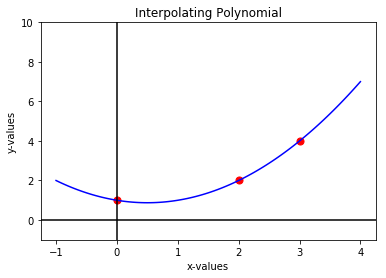

In [3]:
x0 = np.array([0,2,3])
y0 = np.array([1,2,4])

sol = newtdd(x0,y0,len(x0))
print('f(x) = {}'.format(sol[1]))

x_values = np.linspace(-1,4,101)
f = lambdify('x', sol[1])
plt.plot(x_values,f(x_values),c='b')
plt.scatter(x0,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-1,10)
plt.axvline(0,-3,3,c='k')
plt.axhline(0,-3,3,c='k')
plt.title("Interpolating Polynomial")

<strong>Example 2:</strong> Use Newton's divided difference to find the interpolating polynomial passing through the points $(0,2), (1,1), (2,0), (3,-1)$.

f(x) = -1.0*x + 2.0


Text(0.5, 1.0, 'Interpolating Polynomial')

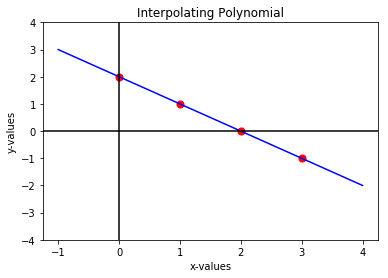

In [4]:
x0 = np.array([0,1,2,3])
y0 = np.array([2,1,0,-1])

sol = newtdd(x0,y0,len(x0))
print('f(x) = {}'.format(sol[1]))

x_values = np.linspace(-1,4,101)
f = lambdify('x', sol[1])
plt.plot(x_values,f(x_values),c='b')
plt.scatter(x0,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-4,4)
plt.axvline(0,-3,3,c='k')
plt.axhline(0,-3,3,c='k')
plt.title("Interpolating Polynomial")

<strong>Example 3:</strong> Interpolate the function $f(x) = sin x$ at 4 equally spaced points on $[0, \frac{\pi}{2}]$.

x0: [0.         0.52359878 1.04719755 1.57079633]
y0: [0.        0.5       0.8660254 1.       ]
f(x) = -0.113871899071412*x*(x - 1.0471975511966)*(x - 0.523598775598299) - 0.244340363998169*x*(x - 0.523598775598299) + 0.954929658551372*x


Text(0.5, 1.0, 'Interpolating Polynomial')

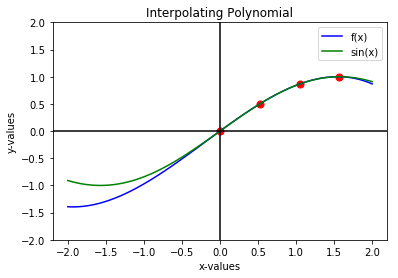

In [5]:
x0 = np.array([0,np.pi/6,2*np.pi/6,3*np.pi/6])
y0 = np.sin(x0)

print('x0: {}'.format(x0))
print('y0: {}'.format(y0))

sol = newtdd(x0,y0,len(x0))
print('f(x) = {}'.format(sol[1]))

x_values = np.linspace(-2,2,101)
f = lambdify('x', sol[1])
plt.plot(x_values,f(x_values),'b', x_values, np.sin(x_values),'g')
plt.scatter(x0,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.legend(['f(x)','sin(x)'])
plt.ylim(-2,2)
plt.axvline(0,-3,3,c='k')
plt.axhline(0,-3,3,c='k')
plt.title("Interpolating Polynomial")

# Runge Phenomenom

<strong>Example 4:</strong> Interpolate $f(x) = \frac{1}{1+12x^{2}}$ at evenly spaced points in $[-1, 1]$ 

Text(0.5, 1.0, 'Interpolating Polynomial')

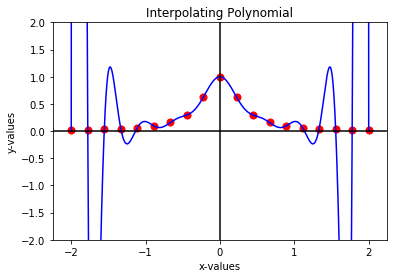

In [6]:
x0 = np.linspace(-2,2,19)
y = lambda x: 1/(1+12*x**2)
y0 = y(x0)

sol = newtdd(x0,y0,len(x0))

x = np.linspace(-2,2,1001)
f = lambdify('x', sol[1])
plt.plot(x,f(x),'b')
plt.scatter(x0,y0,c='r',s=50)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.ylim(-2,2)
plt.axvline(0,-3,3,c='k')
plt.axhline(0,-3,3,c='k')
plt.title("Interpolating Polynomial")